In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [0]:
with open('abstract_10000.pkl', 'rb') as f:
    text_corpus = pickle.load(f)

with open('title_10000.pkl', 'rb') as f:
    title_corpus = pickle.load(f)

In [0]:
# Creating dataframe with a specific number of clusters
def cluster_df(n_clusters): 

  # PCA with 2 components
  X = np.array(text_corpus)
  pca = PCA(n_components=2)
  X_reduced = pca.fit_transform(X)

  label_list = []

  # Clustering
  km = KMeans(n_clusters=n_clusters)
  km.fit(X_reduced)
  label_list.append(km.labels_)
  
  # Creating dataframe
  pca_df = pd.DataFrame(index=title_corpus,columns=['First Component','Second Component'],data=X_reduced)
  pca_df[f'k={n_clusters} labels'] = np.array(label_list).T

  #pca_df['IDs'] = np.arange(1,10000)

  return pca_df

In [4]:
# Trying the method with 3 clusters and check head of the dataframe
pca_df = cluster_df(3)
pca_df.head()

,First Component,Second Component,k=3 labels
Electronic Structure of Single- and Multiple-shell Carbon Fullerenes,0.134320,0.088566,1
Recursion and Path-Integral Approaches to the Analytic Study of the\n Electronic Properties of $C_{60}$,0.087264,-0.051519,1
"Phonon Transmission Rate, Fluctuations, and Localization in Random\n Semiconductor Superlattices: Green's Function Approach",-0.096874,-0.179047,1
Phonon Universal Transmission Fluctuations and Localization in\n Semiconductor Superlattices with a Controlled Degree of Order,0.026146,0.002254,1
The effect of monomer evaporation on a simple model of submonolayer\n growth,-0.628951,-0.052649,2


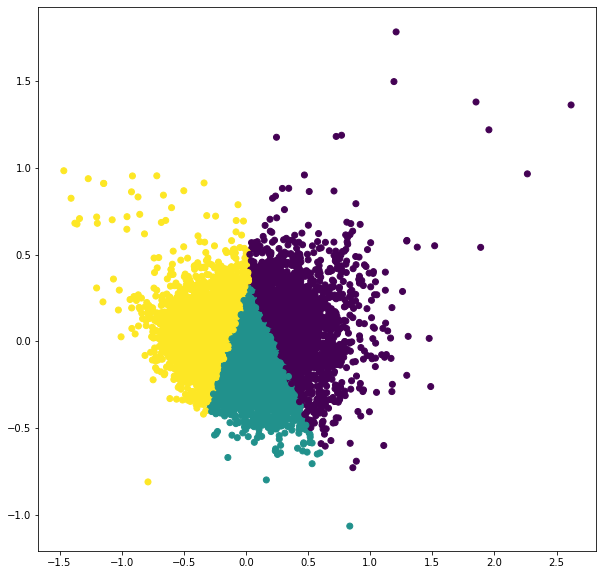

In [5]:
# Plotting the samples
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x=pca_df['First Component'],y=pca_df['Second Component'],c=pca_df.iloc[:,2])